In [ ]:
import pandas as pd
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from tabulate import tabulate

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/data/Dataset3.xlsx')


In [ ]:
df.Temperature.unique()

array([24.87, 28.69, 20.27, 25.07, 25.04, 20.82, 25.95, 26.49, 25.01,
       21.87, 28.96, 26.3 , 27.51, 23.68, 25.52, 25.79, 24.28, 26.59,
       28.11, 28.36, 26.4 , 21.72, 28.28, 21.97, 28.97, 27.13, 27.08,
       27.31, 26.53, 20.28, 24.89, 29.71, 25.1 , 26.54, 22.73, 27.59,
       24.53, 28.48, 25.55, 28.88, 26.09, 20.13, 28.39, 23.43, 24.96,
       27.54, 27.57, 29.87, 21.77, 27.06, 23.79, 28.13, 29.29, 26.29,
       25.76, 27.64, 22.68, 28.74, 26.61, 26.92, 23.98, 28.06, 25.85,
       27.19, 26.45, 23.36, 29.13, 20.41, 25.6 , 29.7 , 28.3 , 23.86,
       26.93, 29.26, 27.8 , 27.01, 26.04, 27.1 , 20.88, 21.14, 28.83,
       27.75, 26.14, 29.18, 26.38, 28.27, 26.58, 26.31, 24.01, 26.73,
       28.44, 21.33, 22.78, 29.03, 25.61, 22.23, 28.99, 24.9 , 27.15,
       25.08, 25.57, 25.28, 27.56, 21.32, 22.09, 26.76, 27.46, 25.43,
       23.84, 28.84, 29.52, 21.67, 25.49, 22.3 , 26.8 , 24.46, 23.06,
       26.36, 23.64, 22.18, 20.05, 26.11, 25.03, 24.98, 20.78, 29.53,
       28.94, 29.38,

In [ ]:
df.head(7)

,Temperature,Humidity,Rainfall,Soil,Crop,Fertilizer
0,24.87,82.84,295.61,Clayey,rice,DAP
1,28.69,96.65,178.96,laterite,Coconut,Good NPK
2,20.27,81.64,270.44,silty clay,rice,MOP
3,25.07,95.02,192.90,sandy,Coconut,Urea
4,25.04,95.90,174.80,coastal,Coconut,Urea
5,20.82,84.13,230.22,clay loam,rice,Urea
6,25.95,93.41,172.05,alluvial,Coconut,Urea


In [ ]:
df.shape

(295, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  295 non-null    float64
 1   Humidity     295 non-null    float64
 2   Rainfall     295 non-null    float64
 3   Soil         295 non-null    object 
 4   Crop         295 non-null    object 
 5   Fertilizer   295 non-null    object 
dtypes: float64(3), object(3)
memory usage: 14.0+ KB


In [ ]:
df.describe()

,Temperature,Humidity,Rainfall
count,295.000000,295.000000,295.000000
mean,25.522068,88.472271,205.330983
std,2.495289,6.550542,43.276280
min,20.050000,80.120000,131.090000
25%,23.810000,82.275000,172.480000
50%,25.760000,84.970000,202.940000
75%,27.170000,94.800000,231.560000
max,29.870000,99.980000,298.560000


In [ ]:
df1 = df.copy()
df2 = df.copy()

En classes d’amplitudes égales (equal-width)

In [ ]:
def discretize_equal_width(col, k):
    min_value = min(col)
    max_value = max(col)
    largeur = (max_value - min_value) / k
    print("Largeur: ",largeur)
    intervals = [min_value + i * largeur for i in range(k)]
    print("interales: ",intervals)
    discretized_data = []
    for value in col:
        category = 0
        for i in range(1, len(intervals)):
            if value <= intervals[i]:
                category = i - 1
                break
        discretized_data.append(category)
    return discretized_data

In [ ]:
import math
#K=1+(10/3)*log(n,base=10) ).
n = len(df1)
k = int(1 + (10/3)*math.log10(n))
print("La valeur de n: ",n)
print("La valeur de k: ",k)

La valeur de n:  295
La valeur de k:  9


In [ ]:
df1['Temperature_DEw'] = discretize_equal_width(df1['Temperature'],k)

Largeur:  1.0911111111111111
interales:  [20.05, 21.141111111111112, 22.232222222222223, 23.323333333333334, 24.414444444444445, 25.505555555555556, 26.596666666666668, 27.68777777777778, 28.77888888888889]


In [ ]:
df1

,Temperature,Humidity,Rainfall,Soil,Crop,Fertilizer,Temperature_DEw
0,24.87,82.84,295.61,Clayey,rice,DAP,4
1,28.69,96.65,178.96,laterite,Coconut,Good NPK,7
2,20.27,81.64,270.44,silty clay,rice,MOP,0
3,25.07,95.02,192.90,sandy,Coconut,Urea,4
4,25.04,95.90,174.80,coastal,Coconut,Urea,4
...,...,...,...,...,...,...,...
290,26.07,96.70,143.53,sandy,Coconut,MOP,5
291,25.63,83.53,209.90,silty clay,rice,MOP,5
292,24.52,83.54,230.45,Clayey,rice,MOP,4
293,25.66,83.47,217.38,Clayey,rice,MOP,5


In [ ]:
result_df = df1[df1['Temperature_DEw'].isin([6, 7])]
result_df['Temperature'].unique()

array([28.69, 27.51, 28.11, 28.36, 28.28, 27.13, 27.08, 27.31, 27.59,
       28.48, 28.39, 27.54, 27.57, 27.06, 28.13, 27.64, 28.74, 26.61,
       26.92, 28.06, 27.19, 28.3 , 26.93, 27.8 , 27.01, 27.1 , 27.75,
       28.27, 26.73, 28.44, 27.15, 27.56, 26.76, 27.46, 26.8 , 28.29,
       26.87, 28.03, 26.88, 28.57, 27.02])

In [ ]:
result_df = df1[df1['Temperature_DEw'].isin([1, 2])]
result_df['Temperature'].unique()

array([21.87, 21.72, 21.97, 22.73, 21.77, 22.68, 21.33, 22.78, 22.23,
       21.32, 22.09, 21.67, 22.3 , 23.06, 22.18, 23.24, 22.71, 21.45,
       21.95, 21.84, 21.53, 21.59, 22.7 , 23.22, 23.  , 21.41])

In [ ]:
colonnes_a_discretiser = ['Temperature']
colonnes_discretiser = ['Temperature_DEw']

In [ ]:
def moyD(dfn):
    for colonne in colonnes_a_discretiser:
        dfn.loc[:, colonne] = dfn.groupby(colonne + '_DEw')[colonne].transform('mean')
    return dfn

In [ ]:
df1 = moyD(df1)
df1.head(5)

,Temperature,Humidity,Rainfall,Soil,Crop,Fertilizer,Temperature_DEw
0,24.957179,82.84,295.61,Clayey,rice,DAP,4
1,28.285714,96.65,178.96,laterite,Coconut,Good NPK,7
2,25.895577,81.64,270.44,silty clay,rice,MOP,0
3,24.957179,95.02,192.90,sandy,Coconut,Urea,4
4,24.957179,95.90,174.80,coastal,Coconut,Urea,4


In [ ]:
df1.Temperature.unique()

array([24.95717949, 28.28571429, 25.89557692, 26.04787879, 21.75666667,
       27.09906977, 23.71896552, 22.82058824])

En classes d’effectifs égaux (equal-frequency).

In [ ]:
def discretize_equal_frequency(df, colonne, num_quantiles):
    # Calculez la position de chaque quantile
    quantile_positions = [int(len(df) * i / num_quantiles) for i in range(1, num_quantiles)]

    # Triez les valeurs pour pouvoir les attribuer aux quantiles
    sorted_values = sorted(df[colonne])

    # Initialisez une liste pour stocker les intervalles
    intervals = [float('-inf')] + [sorted_values[pos] for pos in quantile_positions] + [float('inf')]

    # Étiquetez chaque valeur avec l'indice du quantile auquel elle appartient
    df[colonne + '_DEf'] = pd.cut(df[colonne], bins=intervals, labels=False, include_lowest=True)

    return df

In [ ]:
num_quantiles = int(np.sqrt(len(df2)))
num_quantiles

17

In [ ]:
df2 = discretize_equal_frequency(df2, 'Temperature', num_quantiles)

In [ ]:
def moyDEf(dfn):
    for colonne in colonnes_a_discretiser:
        dfn.loc[:, colonne] = dfn.groupby(colonne + '_DEf')[colonne].transform('mean')
    return dfn

In [ ]:
df2 = moyDEf(df2)
df2.head(5)

,Temperature,Humidity,Rainfall,Soil,Crop,Fertilizer,Temperature_DEf
0,24.713684,82.84,295.61,Clayey,rice,DAP,5
1,28.365000,96.65,178.96,laterite,Coconut,Good NPK,14
2,20.522632,81.64,270.44,silty clay,rice,MOP,0
3,25.138824,95.02,192.90,sandy,Coconut,Urea,6
4,25.138824,95.90,174.80,coastal,Coconut,Urea,6


In [ ]:
df2.Temperature_DEf.unique()

array([ 5, 14,  0,  6,  8, 10,  1, 15,  9, 13,  4,  7,  2, 12, 16,  3, 11])

In [ ]:
df3 = df2.drop('Temperature_DEf', axis=1)
# Utilisation de l'encodage one-hot pour les variables catégoriques
df_encoded = pd.get_dummies(df3)

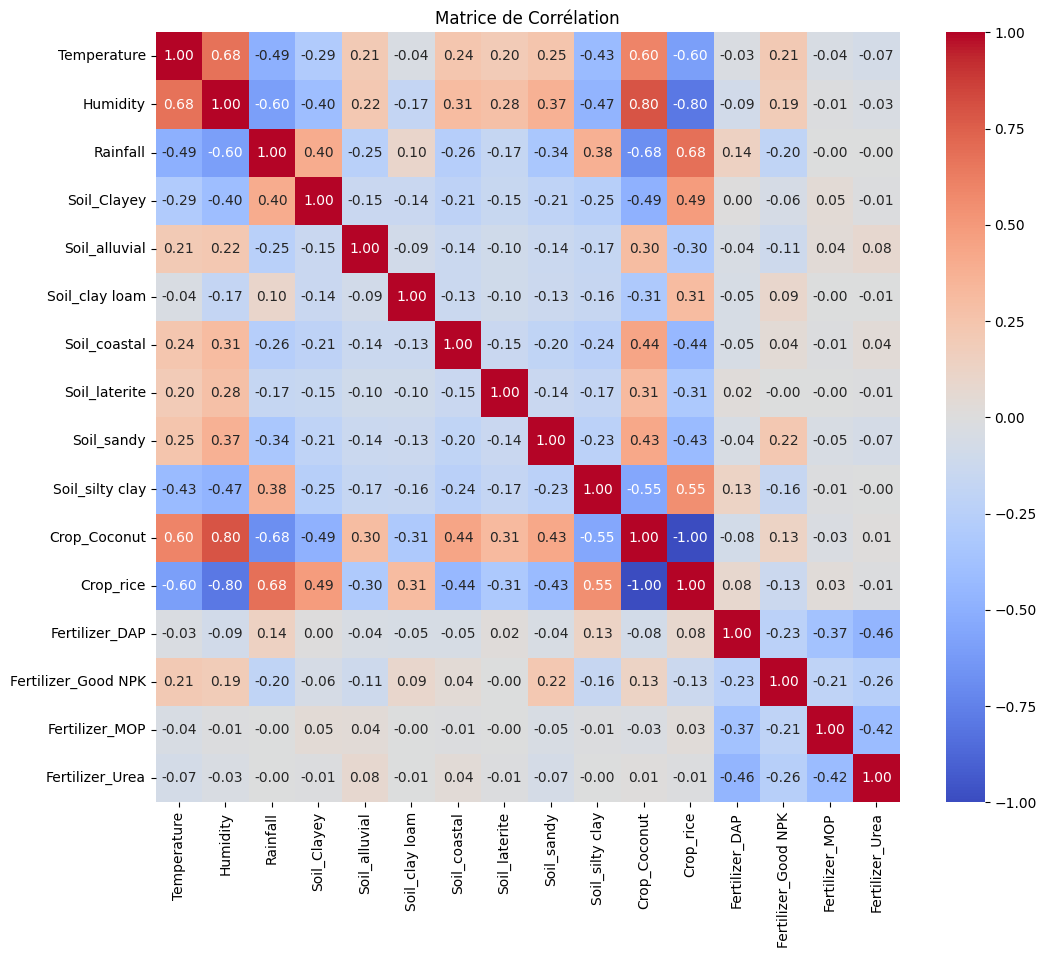

'\nLes valeurs plus proches de 1 ou -1 indiquent une corrélation forte,\ntandis que les valeurs proches de 0 indiquent une corrélation faible.\n'

In [ ]:
# Calculer la matrice de corrélation
correlation_matrix = df_encoded.corr()

# Créer un heatmap pour visualiser la matrice de corrélation
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation')
plt.show()
'''
Les valeurs plus proches de 1 ou -1 indiquent une corrélation forte,
tandis que les valeurs proches de 0 indiquent une corrélation faible.
'''

Apriori

In [ ]:
def generate_box_plot(data, attribute_name, show_outliers=True):
    fig, ax = plt.subplots()

    if show_outliers:
        ax.boxplot(data, vert=False, patch_artist=True, labels=[attribute_name])
    else:
        ax.boxplot(data, vert=False, patch_artist=True, labels=[attribute_name], showfliers=False)

    plt.title(f"Boîte à Moustache de {attribute_name}")
    plt.grid(True)
    plt.show()

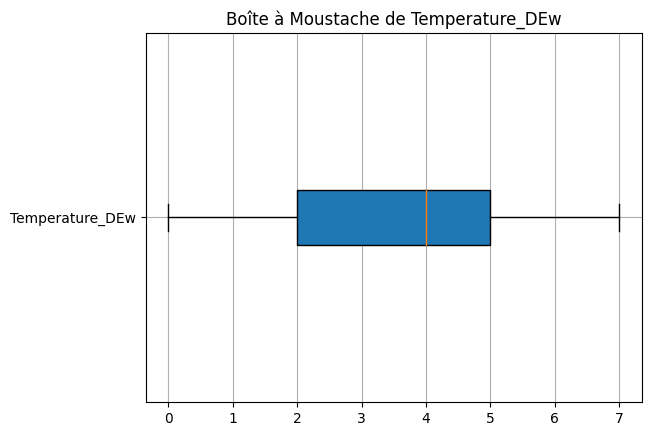

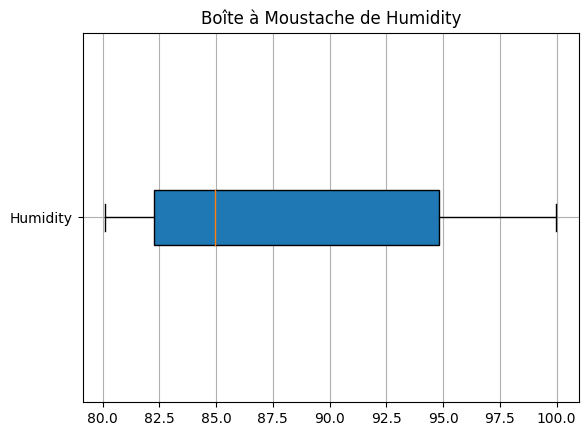

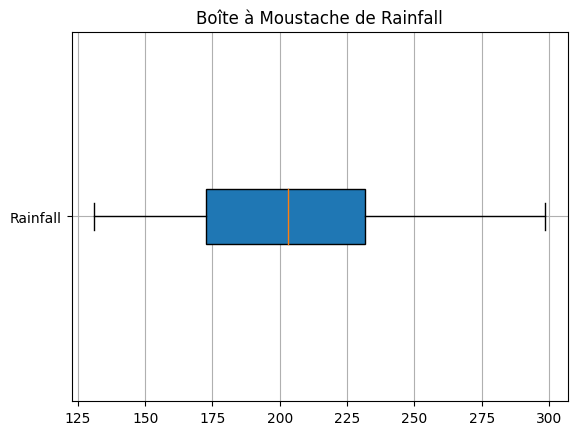

In [ ]:
col = ["Temperature_DEw", "Humidity", "Rainfall"]
for c in col:
    generate_box_plot(df1[c], c, show_outliers=True)

In [ ]:
valeurs_nulles = df1.isnull()
nombre_valeurs_nulles = valeurs_nulles.sum()
nombre_valeurs_nulles

Temperature        0
Humidity           0
Rainfall           0
Soil               0
Crop               0
Fertilizer         0
Temperature_DEw    0
dtype: int64

In [ ]:
df1.Temperature_DEw.unique()

array([4, 7, 0, 5, 1, 6, 3, 2])

In [ ]:
df1.Fertilizer.unique()

array(['DAP', 'Good NPK', 'MOP', 'Urea'], dtype=object)

In [ ]:
df1.Crop.unique()

array(['rice', 'Coconut'], dtype=object)

In [ ]:
R = df1.Soil[df1.Crop == 'Coconut']
R.unique()

array(['laterite', 'sandy', 'coastal', 'alluvial'], dtype=object)

In [ ]:
R = df1.Soil[df1.Crop == 'rice']
R.unique()

array(['Clayey', 'silty clay', 'clay loam'], dtype=object)

In [ ]:
df1.Soil.unique()

array(['Clayey', 'laterite', 'silty clay', 'sandy', 'coastal',
       'clay loam', 'alluvial'], dtype=object)

In [ ]:
Dataset2_bis = pd.DataFrame({
    'Transactions': df1.apply(lambda row: f"{row['Temperature_DEw']}_{row['Crop']}_{row['Fertilizer']}" if all(pd.notna(row[col]) for col in ['Temperature_DEw', 'Crop','Fertilizer']) else None, axis=1)
})

Dataset2_bis

,Transactions
0,4_rice_DAP
1,7_Coconut_Good NPK
2,0_rice_MOP
3,4_Coconut_Urea
4,4_Coconut_Urea
...,...
290,5_Coconut_MOP
291,5_rice_MOP
292,4_rice_MOP
293,5_rice_MOP


In [ ]:
transactions = Dataset2_bis['Transactions'].tolist()

In [ ]:
transactions

['4_rice_DAP',
 '7_Coconut_Good NPK',
 '0_rice_MOP',
 '4_Coconut_Urea',
 '4_Coconut_Urea',
 '0_rice_Urea',
 '5_Coconut_Urea',
 '5_rice_DAP',
 '4_Coconut_Urea',
 '1_rice_Urea',
 '0_Coconut_DAP',
 '5_Coconut_DAP',
 '6_Coconut_Good NPK',
 '3_rice_DAP',
 '5_Coconut_Urea',
 '5_rice_Urea',
 '3_rice_DAP',
 '5_Coconut_Urea',
 '7_Coconut_Urea',
 '7_Coconut_Urea',
 '5_rice_MOP',
 '1_rice_DAP',
 '7_Coconut_Good NPK',
 '1_rice_DAP',
 '0_Coconut_Urea',
 '6_Coconut_DAP',
 '6_Coconut_Urea',
 '6_rice_Urea',
 '5_rice_MOP',
 '0_Coconut_Urea',
 '4_rice_Urea',
 '5_Coconut_Good NPK',
 '0_Coconut_MOP',
 '4_Coconut_Urea',
 '5_rice_DAP',
 '2_rice_DAP',
 '6_Coconut_Good NPK',
 '4_rice_DAP',
 '7_Coconut_Urea',
 '5_Coconut_DAP',
 '0_Coconut_Urea',
 '5_rice_Good NPK',
 '0_rice_MOP',
 '7_Coconut_Urea',
 '3_rice_DAP',
 '4_Coconut_DAP',
 '6_Coconut_Good NPK',
 '6_Coconut_Urea',
 '0_rice_Good NPK',
 '1_rice_Urea',
 '6_Coconut_DAP',
 '3_rice_Urea',
 '7_Coconut_Urea',
 '6_Coconut_Urea',
 '0_Coconut_Urea',
 '5_rice_Urea

In [ ]:
from itertools import combinations

def generate_candidates(transactions, k):
    # Create a dictionary to count the support of itemsets
    itemset_counts = {}

    # Iterate through each transaction to count k-itemsets
    for transaction in transactions:
        # Split the transaction string into individual items
        items = transaction.split('_')

        # Use combinations to generate the combinations of k elements
        k_itemsets = list(combinations(items, k))

        # Increment the counter for each itemset in the transaction
        for itemset in k_itemsets:
            if itemset in itemset_counts:
                itemset_counts[itemset] += 1
            else:
                itemset_counts[itemset] = 1

    # Filter candidate itemsets having sufficient support
    candidate_itemsets = [itemset for itemset, count in itemset_counts.items() if count >= k]
    return candidate_itemsets



In [ ]:
def calculate_support(transactions, itemsets):
    # Compte le nombre d'occurrences de chaque itemset dans les transactions
    support_counts = {}

    for itemset in itemsets:
        for transaction in transactions:
            if all(item in transaction for item in itemset):
                if itemset in support_counts:
                    support_counts[itemset] += 1
                else:
                    support_counts[itemset] = 1

    return support_counts

In [ ]:
def generate_frequent_itemsets(support_counts, k, min_support):
    frequent_itemsets = [itemset for itemset, support in support_counts.items() if support >= min_support]
    return frequent_itemsets


In [ ]:
def apriori_algorithm(transactions, min_support):
    k = 1
    frequent_itemsets = []

    frequent_itemsets_k = True

    while frequent_itemsets_k:

        # Génère les k-itemsets candidats Ck
        candidates = generate_candidates(transactions, k)
        #print('-----------------------------------------------------')
        #print("C:", candidates)
        # Calcule le support de chaque candidat
        support_counts = calculate_support(transactions, candidates)
        frequent_itemsets_k = generate_frequent_itemsets(support_counts, k, min_support)
        #print(support_counts)

        frequent_itemsets.extend(frequent_itemsets_k)
        #print("L:",frequent_itemsets)
        #print('-----------------------------------------------------')
        k += 1
    return frequent_itemsets

Regles d'association

Extraire toutes les regles possibles

In [ ]:
frequent_itemsets = apriori_algorithm(transactions, 2)

In [ ]:
# Fonction de calcul de la confiance
def calculate_confidence(antecedent, consequent,transactions):

    # Compter le nombre de transactions supportant l'ensemble d'items de la règle
    rule_support = sum(1 for transaction in transactions if set(antecedent).issubset(transaction.split('_')) and set(consequent).issubset(transaction.split('_')))

    # Compter le nombre de transactions supportant l'ensemble d'items du côté gauche de la règle
    antecedent_support = sum(1 for transaction in transactions if set(antecedent).issubset(transaction.split('_')))

    # Éviter une division par zéro
    if antecedent_support == 0:
        return 0.0

    # Calculer la confiance
    confidence = rule_support / antecedent_support
    return confidence

In [ ]:
def generate_association_rules(Lk,min_conf,transactions):
    association_rules=[]
    for itemset in Lk:
        itemset = set(itemset)
        if len(itemset) > 1:
            for i in range(1, len(itemset)):
                for antecedent in combinations(itemset, i):
                    antecedent =set(antecedent)
                    consequent = itemset - antecedent
                    f=calculate_confidence(antecedent, consequent, transactions)
                    if f>=min_conf:
                        association_rules.append((antecedent,consequent))
    return association_rules


In [ ]:
association_rules = generate_association_rules(frequent_itemsets, 0, transactions)

# Créez une liste pour stocker les données du tableau
table_data = []

# Parcourez les règles et ajoutez les données au tableau
for rule in association_rules:
    antecedent, consequent = rule
    confidence = calculate_confidence(antecedent, consequent, transactions)
    table_data.append([antecedent, consequent, confidence])

# Définissez les en-têtes du tableau
headers = ["Antecedent", "Consequent", "Confidence"]

# Affichez le tableau
print(tabulate(table_data, headers=headers))


Antecedent               Consequent                 Confidence
-----------------------  -----------------------  ------------
{'4'}                    {'rice'}                    0.564103
{'rice'}                 {'4'}                       0.153846
{'4'}                    {'DAP'}                     0.307692
{'DAP'}                  {'4'}                       0.139535
{'rice'}                 {'DAP'}                     0.328671
{'DAP'}                  {'rice'}                    0.546512
{'Coconut'}              {'7'}                       0.171053
{'7'}                    {'Coconut'}                 0.928571
{'Good NPK'}             {'7'}                       0.121212
{'7'}                    {'Good NPK'}                0.142857
{'Coconut'}              {'Good NPK'}                0.151316
{'Good NPK'}             {'Coconut'}                 0.69697
{'rice'}                 {'0'}                       0.153846
{'0'}                    {'rice'}                    0.423077
{'MOP'}

Effectuer des expérimentations en variant les valeurs de Min_Supp et Min_Conf.

In [ ]:
from tabulate import tabulate
min_supp_values = [1, 2, 3]  # nbr d'apparition
min_conf_values = [0.05, 0.1, 0.5, 1]  # confiance
results_list = []

for min_supp in min_supp_values:
    for min_conf in min_conf_values:
        frequent_itemsets = apriori_algorithm(transactions, min_supp)
        rules = generate_association_rules(frequent_itemsets, min_conf, transactions)
        results_list.append((min_supp, min_conf, rules))

# Display results in a table
headers = ["Min Support", "Min Confidence", "Association Rules"]
table = []

for result in results_list:
    min_supp, min_conf, rules = result
    table.append([min_supp, min_conf, rules])

print(tabulate(table, headers=headers))


  Min Support    Min Confidence  Association Rules
-------------  ----------------  ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Extraction des fortes règles d’associations

In [ ]:
def calculate_lift(antecedent, consequent, transactions):
    # Calculate the support for the combined set of antecedent and consequent
    rule_support = sum(1 for transaction in transactions if set(antecedent).union(set(consequent)).issubset(transaction.split('_')))

    # Calculate the support for the antecedent and consequent separately
    antecedent_support = sum(1 for transaction in transactions if set(antecedent).issubset(transaction.split('_')))
    consequent_support = sum(1 for transaction in transactions if set(consequent).issubset(transaction.split('_')))

    # Avoid division by zero
    if antecedent_support == 0 or consequent_support == 0:
        return 0.0

    # Calculate lift
    lift = (rule_support / len(transactions)) / ((antecedent_support / len(transactions)) * (consequent_support / len(transactions)))
    return lift


In [ ]:
def calculate_cosine(antecedent, consequent, transactions):
    # Calculate the support for the intersection of antecedent and consequent
    intersection_support = sum(1 for transaction in transactions if set(antecedent).intersection(set(consequent)).issubset(transaction.split('_')))

    # Calculate the support for the antecedent and consequent separately
    antecedent_support = sum(1 for transaction in transactions if set(antecedent).issubset(transaction.split('_')))
    consequent_support = sum(1 for transaction in transactions if set(consequent).issubset(transaction.split('_')))

    # Avoid division by zero
    if antecedent_support == 0 or consequent_support == 0:
        return 0.0

    # Calculate cosine similarity
    cosine_similarity = intersection_support / math.sqrt(antecedent_support * consequent_support)
    return cosine_similarity


In [ ]:
def extract_strong_rules(all_itemsets, min_conf, min_lift, min_cosine):
    strong_rules = []
    association_rules = generate_association_rules(frequent_itemsets, min_conf, transactions)


    for rule in association_rules:
        antecedent, consequent = rule

        lift = calculate_lift(antecedent, consequent, all_itemsets)
        cosine = calculate_cosine(antecedent, consequent, all_itemsets)
        confidence = calculate_confidence(antecedent, consequent, transactions)

        if lift >= min_lift and cosine >= min_cosine:
            strong_rules.append((antecedent, consequent, lift, cosine, confidence))

    return strong_rules


In [ ]:
strong_rules = extract_strong_rules(transactions, 0.5,1.5, 1.5)

In [ ]:
from tabulate import tabulate

# Assuming strong_rules is a list of tuples (Antecedent, Consequent, Lift, Cosine)
strong_rules_sorted = sorted(strong_rules, key=lambda rule: rule[2], reverse=True)

table_data_sorted = [(rule[0], rule[1], rule[2], rule[3], rule[4]) for rule in strong_rules_sorted]
headers = ["Antecedent", "Consequent", "Lift", "Cosine", "confidence"]
print(tabulate(table_data_sorted, headers=headers))


Antecedent         Consequent       Lift    Cosine    confidence
-----------------  ------------  -------  --------  ------------
{'2'}              {'rice'}      2.06294   5.98315      1
{'3', 'DAP'}       {'rice'}      2.06294   7.80107      1
{'2', 'DAP'}       {'rice'}      2.06294   9.32406      1
{'2', 'Urea'}      {'rice'}      2.06294  11.0324       1
{'MOP', '2'}       {'rice'}      2.06294  11.0324       1
{'Good NPK', '7'}  {'Coconut'}   1.94079  11.9638       1
{'Urea', '7'}      {'Coconut'}   1.94079   7.97589      1
{'1'}              {'rice'}      1.86647   5.38325      0.904762
{'1', 'Urea'}      {'rice'}      1.83372   8.22305      0.888889
{'1', 'DAP'}       {'rice'}      1.80507   8.72186      0.875
{'7'}              {'Coconut'}   1.80216   4.5219       0.928571
{'3'}              {'rice'}      1.77839   4.58094      0.862069
{'6', 'Good NPK'}  {'Coconut'}   1.69819   8.45971      0.875
{'MOP', '7'}       {'Coconut'}   1.69819   8.45971      0.875
{'MOP', '6'}      

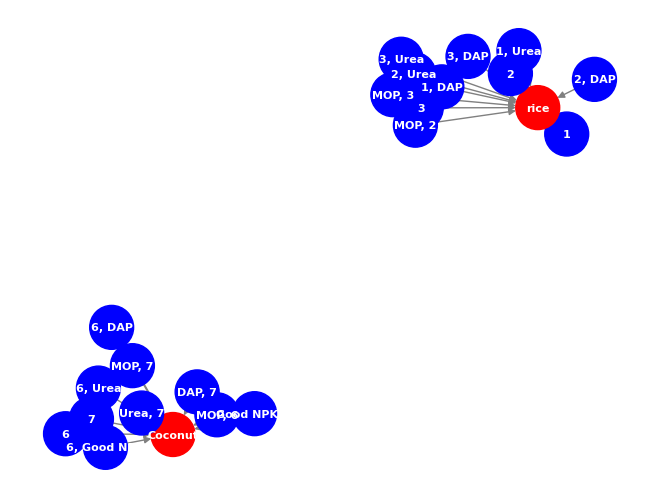

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()

for rule in strong_rules:
    antecedent_str = ', '.join(rule[0])
    consequent_str = ', '.join(rule[1])

    G.add_node(antecedent_str, color='blue')
    G.add_node(consequent_str, color='red')
    G.add_edge(antecedent_str, consequent_str)

pos = nx.spring_layout(G)
node_colors = [G.nodes[n]['color'] for n in G.nodes]

nx.draw(G, pos, with_labels=True, node_color=node_colors, font_size=8, font_color='white', font_weight='bold', node_size=1000, edge_color='gray')

plt.show()
